In [1]:
import numpy as np
import pandas as pd
import warnings
import re
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
passing_1985 = pd.read_csv("NFL_passing_1985.csv")
passing_1985_qb = passing_1985[(passing_1985['Pos'] == "QB") | (passing_1985['Pos'] == "qb")]
passing_1985_qb['Player'] = passing_1985_qb['Player'].str.replace('[+$]+', '')
passing_1985_qb['Player'] = passing_1985_qb['Player'].str.replace('[*$]+', '')
passing_1985_qb = passing_1985_qb[passing_1985_qb['GS'] >= 8]
print(len(passing_1985_qb))
passing_1985_qb.head()

28


,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Y/C,Y/G,Rate,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD
0,1,Dan Marino,MIA,24,QB,16,16,12/4/00,336,567,...,12.3,258.6,84.1,18,157,3.1,6.80,6.21,3.0,5.0
1,2,John Elway,DEN,25,QB,16,16,11/5/00,327,605,...,11.9,243.2,70.2,38,307,5.9,5.57,4.65,6.0,6.0
2,3,Ken O'Brien,NYJ,25,QB,16,16,11/5/00,297,488,...,13.1,243.0,96.2,62,399,11.3,6.34,6.60,1.0,1.0
3,4,Phil Simms,NYG,30,QB,16,16,10/6/00,275,495,...,13.9,239.3,78.6,52,396,9.5,6.28,5.44,0.0,0.0
4,5,Joe Montana,SFO,29,QB,15,15,9/6/00,303,494,...,12.1,243.5,91.3,35,246,6.6,6.44,6.36,1.0,1.0


In [3]:
rushing_1985 = pd.read_csv("NFL_rushing_1985.csv")
rushing_1985_qb = rushing_1985[(rushing_1985['Pos'] == "QB") | (rushing_1985['Pos'] == "qb")]
rushing_1985_qb['Player'] = rushing_1985_qb['Player'].str.replace('[+$]+', '')
rushing_1985_qb['Player'] = rushing_1985_qb['Player'].str.replace('[*$]+', '')
rushing_1985_qb = rushing_1985_qb[rushing_1985_qb['GS'] >= 8]
rushing_1985_qb["Year"] = 1985
print(len(rushing_1985_qb))
rushing_1985_qb.head()

28


,Rk,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,Lng,Y/A,Y/G,Fmb,Year
59,60,David Archer,ATL,23,QB,16,11,70,347,2,29,5.0,21.7,9,1985
69,70,John Elway,DEN,25,QB,16,16,51,253,0,22,5.0,15.8,7,1985
73,74,Jim McMahon,CHI,26,QB,13,11,47,252,3,19,5.4,19.4,4,1985
79,80,Joe Montana,SFO,29,QB,15,15,42,153,3,16,3.6,10.2,5,1985
83,84,Warren Moon,HOU,29,QB,14,14,39,130,0,17,3.3,9.3,12,1985


In [4]:
passing_2021 = pd.read_csv("NFL_passing_2021.csv")
passing_2021_qb = passing_2021[(passing_2021['Pos'] == "QB") | (passing_2021['Pos'] == "qb")]
passing_2021_qb['Player'] = passing_2021_qb['Player'].str.replace('[+$]+', '')
passing_2021_qb['Player'] = passing_2021_qb['Player'].str.replace('[*$]+', '')
passing_2021_qb = passing_2021_qb[passing_2021_qb['GS'] >= 8]
print(len(passing_2021_qb))
passing_2021_qb.head()

32


,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Y/G,Rate,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD
0,1,Tom Brady,TAM,44,QB,17,17,13-4-0,485,719,...,312.7,102.1,68.1,22,144,3.0,6.98,7.41,3.0,5.0
1,2,Justin Herbert,LAC,23,QB,17,17,9/8/00,443,672,...,294.9,97.7,65.6,31,214,4.4,6.83,6.95,5.0,5.0
2,3,Matthew Stafford,LAR,33,QB,17,17,12/5/00,404,601,...,287.4,102.9,63.8,30,243,4.8,7.36,7.45,3.0,4.0
3,4,Patrick Mahomes,KAN,26,QB,17,17,12/5/00,436,658,...,284.6,98.5,62.2,28,146,4.1,6.84,7.07,3.0,3.0
4,5,Derek Carr,LVR,30,QB,17,17,10/7/00,428,626,...,282.6,94.0,52.4,40,241,6.0,6.85,6.60,3.0,6.0


In [5]:
rushing_2021 = pd.read_csv("NFL_rushing_2021.csv")
rushing_2021_qb = rushing_2021[(rushing_2021['Pos'] == "QB") | (rushing_2021['Pos'] == "qb")]
rushing_2021_qb['Player'] = rushing_2021_qb['Player'].str.replace('[+$]+', '')
rushing_2021_qb['Player'] = rushing_2021_qb['Player'].str.replace('[*$]+', '')
rushing_2021_qb = rushing_2021_qb[rushing_2021_qb['GS'] >= 8]
print(len(rushing_2021_qb))
rushing_2021_qb.head()

32


,Rk,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb
34,35,Jalen Hurts,PHI,23,QB,15,15,139,784,10,56,31,5.6,52.3,9
40,41,Lamar Jackson,BAL,24,QB,12,12,133,767,2,48,31,5.8,63.9,6
43,44,Josh Allen,BUF,25,QB,17,17,122,763,6,54,34,6.3,44.9,8
56,57,Kyler Murray,ARI,24,QB,14,14,88,423,5,25,57,4.8,30.2,13
62,63,Trevor Lawrence,JAX,22,QB,17,17,73,334,2,22,26,4.6,19.6,9


In [6]:
# Merge 1985 datasets
qb_1985 = pd.merge(passing_1985_qb, rushing_1985_qb, on = "Player")
qb_1985[['Wins', 'Losses', 'Ties']] = qb_1985['QBrec'].str.split('[/|-]', expand=True)
qb_1985 = qb_1985.drop(columns = ["Rk_x", "Rk_y", "Pos_y", "G_y", "GS_y", "Age_y", "Tm_y", "QBrec"])
qb_1985["Year"] = 1985
qb_1985['Winpct'] = (qb_1985['Wins'].astype(int) + 0.5*(qb_1985['Ties'].astype(int))) / qb_1985['GS_x'].astype(int)
qb_1985 = qb_1985.dropna()
print(len(qb_1985))
qb_1985.head()

20


,Player,Tm_x,Age_x,Pos_x,G_x,GS_x,Cmp,Att_x,Cmp%,Yds_x,...,TD_y,Lng_y,Y/A_y,Y/G_y,Fmb,Year,Wins,Losses,Ties,Winpct
0,Dan Marino,MIA,24,QB,16,16,336,567,59.3,4137,...,0,6,-0.9,-1.5,9,1985,12,4,00,0.7500
1,John Elway,DEN,25,QB,16,16,327,605,54.0,3891,...,0,22,5.0,15.8,7,1985,11,5,00,0.6875
2,Ken O'Brien,NYJ,25,QB,16,16,297,488,60.9,3888,...,0,22,2.3,3.6,14,1985,11,5,00,0.6875
3,Phil Simms,NYG,30,QB,16,16,275,495,55.6,3829,...,0,28,3.6,8.3,16,1985,10,6,00,0.6250
4,Joe Montana,SFO,29,QB,15,15,303,494,61.3,3653,...,3,16,3.6,10.2,5,1985,9,6,00,0.6000


In [7]:
# Merge 2021 datasets
qb_2021 = pd.merge(passing_2021_qb, rushing_2021_qb, on = "Player")
qb_2021[['Wins', 'Losses', 'Ties']] = qb_2021['QBrec'].str.split('[/|-]', expand=True)
qb_2021 = qb_2021.drop(columns = ["Rk_x", "Rk_y", "Pos_y", "G_y", "GS_y", "Age_y", "Tm_y", "QBrec"])
qb_2021["Year"] = 2021
qb_2021['Winpct'] = (qb_2021['Wins'].astype(int) + 0.5*(qb_2021['Ties'].astype(int))) / qb_2021['GS_x'].astype(int)
qb_2021 = qb_2021.dropna()
print(len(qb_2021))
qb_2021.head()

25


,Player,Tm_x,Age_x,Pos_x,G_x,GS_x,Cmp,Att_x,Cmp%,Yds_x,...,1D_y,Lng_y,Y/A_y,Y/G_y,Fmb,Wins,Losses,Ties,Year,Winpct
0,Tom Brady,TAM,44,QB,17,17,485,719,67.5,5316,...,14,13,2.9,4.8,4,13,4,0,2021,0.764706
1,Justin Herbert,LAC,23,QB,17,17,443,672,65.9,5014,...,28,36,4.8,17.8,1,9,8,00,2021,0.529412
2,Matthew Stafford,LAR,33,QB,17,17,404,601,67.2,4886,...,8,12,1.3,2.5,5,12,5,00,2021,0.705882
3,Patrick Mahomes,KAN,26,QB,17,17,436,658,66.3,4839,...,25,32,5.8,22.4,9,12,5,00,2021,0.705882
4,Derek Carr,LVR,30,QB,17,17,428,626,68.4,4804,...,9,22,2.7,6.4,13,10,7,00,2021,0.588235


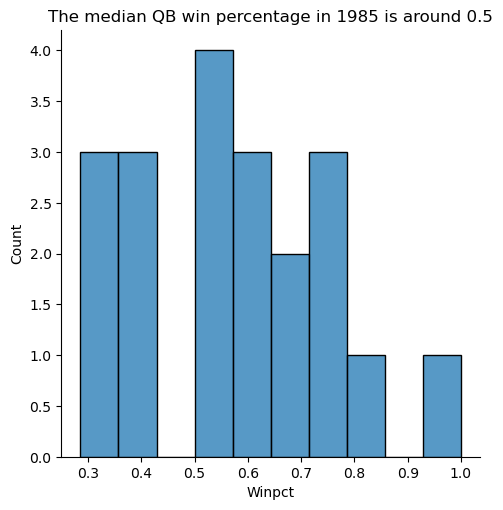

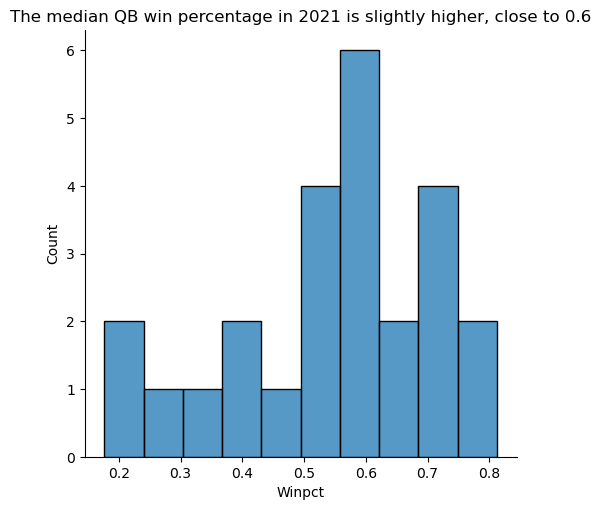

In [8]:
sns.displot(data=qb_1985, x="Winpct", bins = 10).set(title='The median QB win percentage in 1985 is around 0.5')
sns.displot(data=qb_2021, x="Winpct", bins = 10).set(title='The median QB win percentage in 2021 is slightly higher, close to 0.6')

In [9]:
qb_all = pd.concat([qb_2021, qb_1985])
sns.scatterplot(data = qb_all, x = "Y/G_y", y = "Winpct", hue = "Year").set(title='Mobile QBs do not necessarily produce more wins')

[Text(0.5, 1.0, 'Mobile QBs do not necessarily produce more wins')]

In [10]:
sns.scatterplot(data = qb_all, x = "Y/G_x", y = "Winpct", hue = "Year").set(title='QBs with more passing yards tend to win more games')

[Text(0.5, 1.0, 'QBs with more passing yards tend to win more games')]

In [11]:
print(qb_1985.columns.tolist())
print(qb_2021.columns.tolist())

['Player', 'Tm_x', 'Age_x', 'Pos_x', 'G_x', 'GS_x', 'Cmp', 'Att_x', 'Cmp%', 'Yds_x', 'TD_x', 'TD%', 'Int', 'Int%', 'Lng_x', 'Y/A_x', 'AY/A', 'Y/C', 'Y/G_x', 'Rate', 'Sk', 'Yds.1', 'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD', 'Att_y', 'Yds_y', 'TD_y', 'Lng_y', 'Y/A_y', 'Y/G_y', 'Fmb', 'Year', 'Wins', 'Losses', 'Ties', 'Winpct']
['Player', 'Tm_x', 'Age_x', 'Pos_x', 'G_x', 'GS_x', 'Cmp', 'Att_x', 'Cmp%', 'Yds_x', 'TD_x', 'TD%', 'Int', 'Int%', '1D_x', 'Lng_x', 'Y/A_x', 'AY/A', 'Y/C', 'Y/G_x', 'Rate', 'QBR', 'Sk', 'Yds.1', 'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD', 'Att_y', 'Yds_y', 'TD_y', '1D_y', 'Lng_y', 'Y/A_y', 'Y/G_y', 'Fmb', 'Wins', 'Losses', 'Ties', 'Year', 'Winpct']


In [50]:
# 1985 passing model
lm_1985_passing = LinearRegression(fit_intercept=False)
y_1 = qb_1985['Winpct']
x_1 = qb_1985[['Age_x', 'Cmp', 'Att_x', 'Yds_x', 'TD_x', 'Int', 'Lng_x', 'Rate', 'Sk']]
lm_1985_passing.fit(X = x_1, y = y_1)
qb_1985["predicted_Winpct_passing"] = lm_1985_passing.predict(x_1)
coefficents_1985_passing = pd.DataFrame(zip(x_1.columns, lm_1985_passing.coef_))
print(coefficents_1985_passing)

       0         1
0  Age_x -0.003603
1    Cmp  0.002781
2  Att_x -0.001460
3  Yds_x  0.000057
4   TD_x -0.017817
5    Int  0.011439
6  Lng_x -0.001233
7   Rate  0.011294
8     Sk -0.004678


In [51]:
# 1985 rushing model
lm_1985_rushing = LinearRegression(fit_intercept=False)
y_2 = qb_1985['Winpct']
x_2 = qb_1985[['Age_x', 'Att_y', 'Yds_y', 'TD_y', 'Lng_y', 'Fmb']]
lm_1985_rushing.fit(X = x_2, y = y_2)
qb_1985["predicted_Winpct_rushing"] = lm_1985_rushing.predict(x_2)
coefficents_1985_rushing = pd.DataFrame(zip(x_2.columns, lm_1985_rushing.coef_))
print(coefficents_1985_rushing)

       0         1
0  Age_x  0.014486
1  Att_y  0.005024
2  Yds_y  0.000262
3   TD_y  0.055074
4  Lng_y -0.004526
5    Fmb  0.001880


In [52]:
# 2021 passing model
lm_2021_passing = LinearRegression(fit_intercept=False)
y_3 = qb_2021['Winpct']
x_3 = qb_2021[['Age_x', 'Cmp', 'Att_x', 'Yds_x', 'TD_x', 'Int', 'Lng_x', 'Rate', 'Sk']]
lm_2021_passing.fit(X = x_3, y = y_3)
qb_2021["predicted_Winpct_passing"] = lm_2021_passing.predict(x_3)
coefficents_2021_passing = pd.DataFrame(zip(x_3.columns, lm_2021_passing.coef_))
print(coefficents_2021_passing)

       0         1
0  Age_x  0.006735
1    Cmp  0.003979
2  Att_x -0.002808
3  Yds_x -0.000050
4   TD_x  0.007171
5    Int  0.014989
6  Lng_x  0.001200
7   Rate  0.003061
8     Sk -0.002564


In [53]:
# 2021 rushing model
lm_2021_rushing = LinearRegression(fit_intercept=False)
y_4 = qb_2021['Winpct']
x_4 = qb_2021[['Age_x', 'Att_y', 'Yds_y', 'TD_y', 'Lng_y', 'Fmb']]
lm_2021_rushing.fit(X = x_4, y = y_4)
qb_2021["predicted_Winpct_rushing"] = lm_2021_rushing.predict(x_4)
coefficents_2021_rushing = pd.DataFrame(zip(x_4.columns, lm_2021_rushing.coef_))
print(coefficents_2021_rushing)

       0         1
0  Age_x  0.013580
1  Att_y  0.008096
2  Yds_y -0.001089
3   TD_y  0.010291
4  Lng_y -0.000410
5    Fmb -0.005203


In [14]:
qb_1985.head()

,Player,Tm_x,Age_x,Pos_x,G_x,GS_x,Cmp,Att_x,Cmp%,Yds_x,...,Lng_y,Y/A_y,Y/G_y,Fmb,Year,Wins,Losses,Ties,Winpct,predicted_Winpct
0,Dan Marino,MIA,24,QB,16,16,336,567,59.3,4137,...,6,-0.9,-1.5,9,1985,12,4,00,0.7500,0.7500
1,John Elway,DEN,25,QB,16,16,327,605,54.0,3891,...,22,5.0,15.8,7,1985,11,5,00,0.6875,0.6875
2,Ken O'Brien,NYJ,25,QB,16,16,297,488,60.9,3888,...,22,2.3,3.6,14,1985,11,5,00,0.6875,0.6875
3,Phil Simms,NYG,30,QB,16,16,275,495,55.6,3829,...,28,3.6,8.3,16,1985,10,6,00,0.6250,0.6250
4,Joe Montana,SFO,29,QB,15,15,303,494,61.3,3653,...,16,3.6,10.2,5,1985,9,6,00,0.6000,0.6000


In [15]:
qb_2021.head()

,Player,Tm_x,Age_x,Pos_x,G_x,GS_x,Cmp,Att_x,Cmp%,Yds_x,...,Lng_y,Y/A_y,Y/G_y,Fmb,Wins,Losses,Ties,Year,Winpct,predicted_Winpct
0,Tom Brady,TAM,44,QB,17,17,485,719,67.5,5316,...,13,2.9,4.8,4,13,4,0,2021,0.764706,0.764706
1,Justin Herbert,LAC,23,QB,17,17,443,672,65.9,5014,...,36,4.8,17.8,1,9,8,00,2021,0.529412,0.529412
2,Matthew Stafford,LAR,33,QB,17,17,404,601,67.2,4886,...,12,1.3,2.5,5,12,5,00,2021,0.705882,0.705882
3,Patrick Mahomes,KAN,26,QB,17,17,436,658,66.3,4839,...,32,5.8,22.4,9,12,5,00,2021,0.705882,0.705882
4,Derek Carr,LVR,30,QB,17,17,428,626,68.4,4804,...,22,2.7,6.4,13,10,7,00,2021,0.588235,0.588235


In [54]:
# 1985 passing MSE and R2
mse_1985_passing = mean_squared_error(qb_1985["Winpct"].values, qb_1985["predicted_Winpct_passing"].values)
r2_1985_passing = r2_score(qb_1985["Winpct"].values, qb_1985["predicted_Winpct_passing"].values)
print("-----1985 Passing-----")
print(mse_1985_passing)
print(r2_1985_passing)

# 1985 rushing MSE and R2
mse_1985_rushing = mean_squared_error(qb_1985["Winpct"].values, qb_1985["predicted_Winpct_rushing"].values)
r2_1985_rushing = r2_score(qb_1985["Winpct"].values, qb_1985["predicted_Winpct_rushing"].values)
print("-----1985 Rushing-----")
print(mse_1985_rushing)
print(r2_1985_rushing)

# 2021 passing MSE and R2
mse_2021_passing = mean_squared_error(qb_2021["Winpct"].values, qb_2021["predicted_Winpct_passing"].values)
r2_2021_passing = r2_score(qb_2021["Winpct"].values, qb_2021["predicted_Winpct_passing"].values)
print("-----2021 Passing-----")
print(mse_2021_passing)
print(r2_2021_passing)

# 2021 rushing MSE and R2
mse_2021_rushing = mean_squared_error(qb_2021["Winpct"].values, qb_2021["predicted_Winpct_rushing"].values)
r2_2021_rushing = r2_score(qb_2021["Winpct"].values, qb_2021["predicted_Winpct_rushing"].values)
print("-----2021 Rushing-----")
print(mse_2021_rushing)
print(r2_2021_rushing)

-----1985 Passing-----
0.025970505338201978
0.27336368508153264
-----1985 Rushing-----
0.029779612090032947
0.16678758048759956
-----2021 Passing-----
0.008552562519854789
0.665845450032264
-----2021 Rushing-----
0.01643456060996532
0.3578903174584822


In [55]:
import statsmodels.api as sm

ols_1985_passing = sm.OLS(y_1, x_1)
print(ols_1985_passing.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 Winpct   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              15.44
Date:                Wed, 07 Dec 2022   Prob (F-statistic):                    4.99e-05
Time:                        20:37:10   Log-Likelihood:                          8.1292
No. Observations:                  20   AIC:                                      1.742
Df Residuals:                      11   BIC:                                      10.70
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [56]:
ols_1985_rushing = sm.OLS(y_2, x_2)
print(ols_1985_rushing.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 Winpct   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              25.40
Date:                Wed, 07 Dec 2022   Prob (F-statistic):                    9.22e-07
Time:                        20:37:14   Log-Likelihood:                          6.7605
No. Observations:                  20   AIC:                                     -1.521
Df Residuals:                      14   BIC:                                      4.453
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [57]:
ols_2021_passing = sm.OLS(y_3, x_3)
print(ols_2021_passing.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 Winpct   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              64.57
Date:                Wed, 07 Dec 2022   Prob (F-statistic):                    7.12e-11
Time:                        20:37:18   Log-Likelihood:                          24.046
No. Observations:                  25   AIC:                                     -30.09
Df Residuals:                      16   BIC:                                     -19.12
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [58]:
ols_2021_rushing = sm.OLS(y_4, x_4)
print(ols_2021_rushing.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 Winpct   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              58.34
Date:                Wed, 07 Dec 2022   Prob (F-statistic):                    3.17e-11
Time:                        20:37:21   Log-Likelihood:                          15.881
No. Observations:                  25   AIC:                                     -19.76
Df Residuals:                      19   BIC:                                     -12.45
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------